# NLP (Twitter Mining, WordClouds and Sentiment Analysis)

## Load libraries

In [1]:
options(warn=-1)
library('twitteR')
library('RCurl')
library('tm')
library('wordcloud')
library('stringr')
library('wordcloud2')
library('syuzhet')
library('lubridate')
library('ggplot2')
library('scales')
library('reshape2')
library('dplyr')


Loading required package: NLP
Loading required package: RColorBrewer

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate


Attaching package: 'scales'

The following object is masked from 'package:syuzhet':

    rescale


Attaching package: 'dplyr'

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:twitteR':

    id, location

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Set up twitter authentication

In [2]:
consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

In [3]:
setup_twitter_oauth(consumer_key,consumer_secret,access_token,access_secret)

[1] "Using direct authentication"


## Mine subject text from twitter

In [4]:
## Input key words for subject matter.
tweet_topic = 'bbi'
plot_topic = 'BBI Sentiment'

## Common words to be omitted from word cloud
ommision_words = c('bbi','initiative','building','bridges')

## Pull tweets from twitter API
tweet_search = searchTwitter(tweet_topic,n=500,lang = 'en',resultType = 'recent')

In [5]:
##Pull out the tweets text
twitter_text = sapply(tweet_search,function (x) x$getText())
## Convert the tweet texts into corpus                     
corpus = Corpus(VectorSource(twitter_text))

In [6]:
## Check out sample of tweets mined
inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] RT @OliverMathenge: The President is currently lecturing the High Court judges who declared BBI null and void.                              
[2] @CrazyDREAMER254 @ItsMutai Which bbi???<U+0001F602><U+0001F602>or high court ruled out their ruling na hatujui<U+0001F602><U+0001F602><U+0001F602>imagine being loved wher… https://t.co/o8qnsATZtP
[3] RT @DMarigiri_: BBI provides longterm solutions to pressing challenges holding back the country from progress such as disunity, lack of inc…
[4] Most lives of the people were actually relying on the BBI because thats where development and perfect change was to… https://t.co/TvhCCuJMCy
[5] We have a spoilt kid for president who can’t take no for an answer,I hope the Court of Appeal upholds HC ruling on… https://t.co/Ie5tdh5Nwq 


## Clean up tweets

In [7]:
## Clean up corpus 
corpus = tm_map(corpus,tolower)
corpus = tm_map(corpus,removePunctuation)
corpus = tm_map(corpus,removeNumbers)
corpus = tm_map(corpus,removeWords,ommision_words)
cleanset = tm_map(corpus,removeWords,stopwords('english'))

In [8]:
## Omit URLs
removeURL = function(x) gsub('http[:alnum:]*','',x)
cleanset =tm_map(cleanset,content_transformer(removeURL))

In [9]:
## Omit white space
cleanset = tm_map(cleanset,stripWhitespace)

## Document term matrix

In [10]:
## Create document term matrix
tdm = TermDocumentMatrix(cleanset)

In [11]:
tdm

<<TermDocumentMatrix (terms: 1457, documents: 500)>>
Non-/sparse entries: 5227/723273
Sparsity           : 99%
Maximal term length: 364
Weighting          : term frequency (tf)

In [12]:
## Convert tdm to matrix
tdm = as.matrix(tdm)

In [13]:
## Sample view tdm
tdm[1:10,1:20]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
court,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
currently,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
declared,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
high,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
judges,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0
lecturing,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
null,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
olivermathenge,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
president,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0
void,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [14]:
## Get frequency of words
w = rowSums(tdm)
head(w)

court currently  declared      high    judges lecturing 
       26         4         4        10        61        15

In [15]:
## Filter for frequency of words for certain threshold
w = subset(w,w>10)
w

court             judges          lecturing     olivermathenge 
                26                 61                 15                 12 
         president           itsmutai            country             people 
                65                 16                 15                 97 
                 …                say              voice          judiciary 
                77                 22                 11                 20 
           kenyans letthepeopledecide      ahmednasirlaw                day 
                59                104                 67                 34 
                d…                hon              koome               lady 
                20                 20                 20                 20 
          madaraka             martha             record              reply 
                33                 20                 22                 21 
            speech              state             uhurus               will 
                31                 20                 20                127 
             every             masaah          oleitumbi        threatening 
                14                 46                 12                 20 
              ruto             better               dare            imagine 
                14                 29                 25                 25 
             kenya             oppose           opposing          substance 
                45                 27                 25                 25 
             uhuru           majority               bill                let 
                52                 17                 12                 16 
           empower              enjoy            focuses         population 
                13                 13                 15                 15 
     stcovubstkuh…              youth             agenda          generally 
                12                 34                 24                 20 
           improve           informed           kenyans…          ninepoint 
                20                 20                 20                 20 
           process              seeks            welfare            attempt 
                20                 32                 22                 13 
          election      nullification       presidential               stop 
                15                 14                 13                 26 
          kenyatta                new             nation         allocation 
                26                 18                 17                 23 
      constitution             youths             public            support 
                12                 12                 17                 11 
             final              shall              eager           peaceful 
                15                 13                 12                 12 
            points           projete…               yvie            address 
                12                 11                 11                 12 
          inequity            nyarari     representation           resource 
                12                 13                 12                 12 
      stcoejfdnvnn              years           kahodari                men 
                12                 12                 14                 21 
              part             county              forum       independence 
                11                 13                 12                 12 
             judg…           judicial      mohajichopevu              order 
                13                 12                 14                 12 
           totally              women              clear         corruption 
                12                 11                 11                 11 
           kericho             decide 
                12                 14

## Text visualization

### Word Frequencies

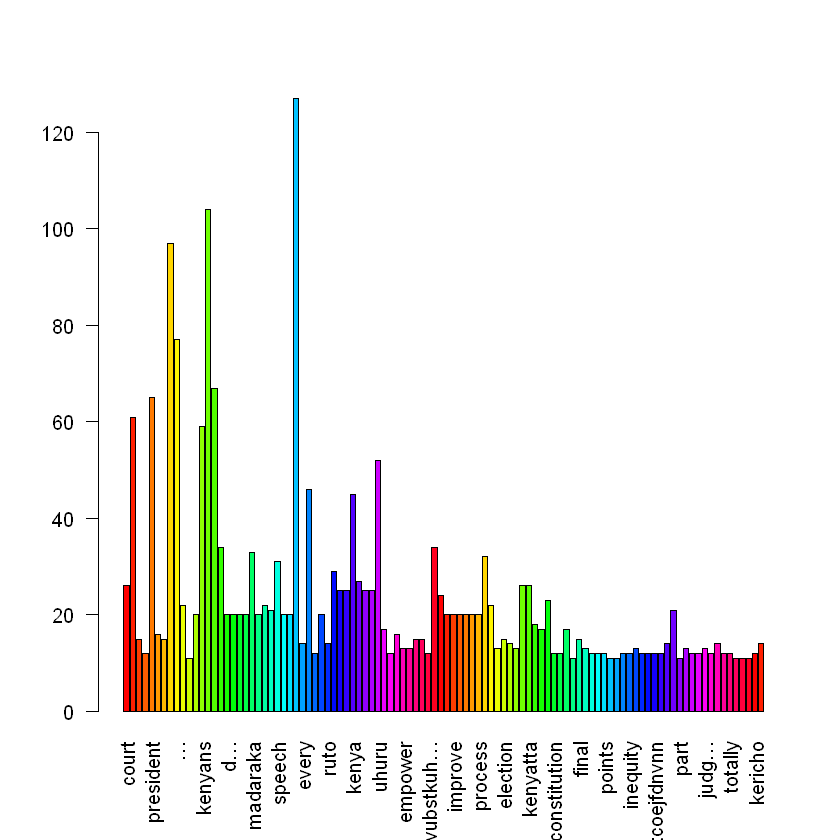

In [16]:
## Plot word frequency distributions
barplot(w,las=2,col=rainbow(50))

In [17]:
## Order words according to frequency
w = sort(rowSums(tdm),decreasing = TRUE)

## WordClouds

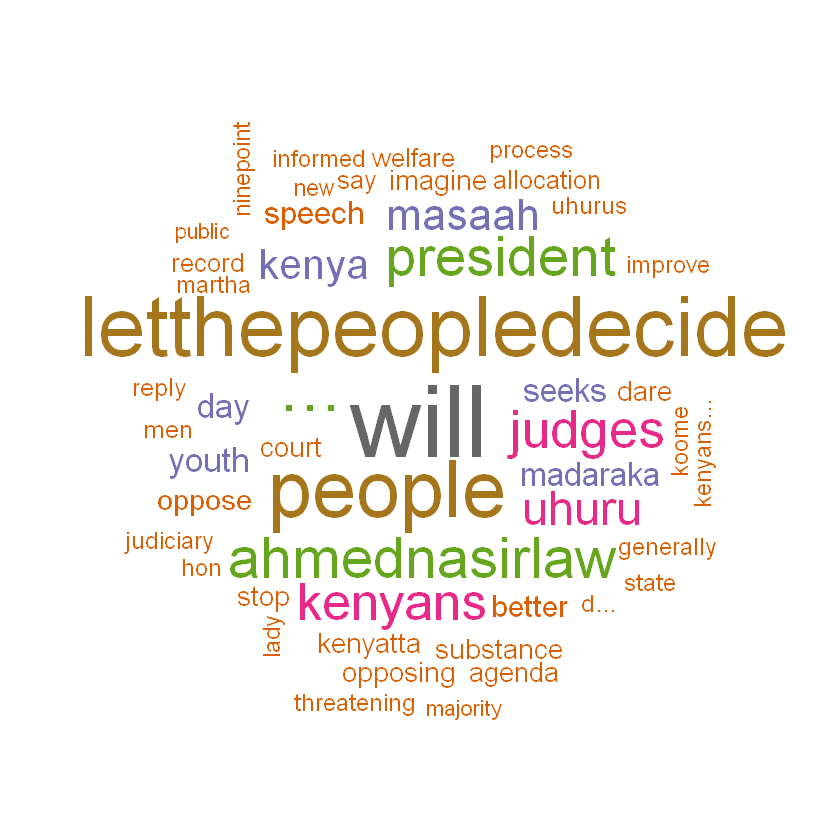

In [18]:
## Set seed and plot wordclouds
set.seed(222)
wordcloud(words=names(w),freq=w,max.words = 50,random.order = F,min.freq = 5,colors=brewer.pal(8,'Dark2'),scale = c(5,0.5))

In [19]:
## Create a dataframe of word frequencies
w = data.frame(names(w),w)
colnames(w) = c('word','freq')

In [20]:
## Dataset view
head(w)

,word,freq
,<fct>,<dbl>
will,will,127
letthepeopledecide,letthepeopledecide,104
people,people,97
…,…,77
ahmednasirlaw,ahmednasirlaw,67
president,president,65


In [21]:
## Fancier wordclouds
wordcloud2(w,size=0.8,shape='circle',minSize = 5)

HTML widgets cannot be represented in plain text (need html)

## SENTIMENT ANALYSIS

Sentiment analysis will aim to indicate publics opinion on a particular topic.

In [22]:
## Get twitter text
twitter_text = sapply(tweet_search,function (x) x$getText())

In [23]:
## Generate sentiment scores
s = get_nrc_sentiment(twitter_text)

In [24]:
## Dataset view
head(s)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,0,1,0,0,0,1,0,1
2,1,1,0,1,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,1,1
4,0,1,0,1,1,0,0,1,0,1
5,1,3,0,1,1,0,1,2,0,2
6,1,1,0,0,1,0,1,1,1,1


In [25]:
## Sample tweet
twitter_text[5]

[1] "We have a spoilt kid for president who can’t take no for an answer,I hope the Court of Appeal upholds HC ruling on… https://t.co/Ie5tdh5Nwq"

In [26]:
## Sample sentiment for particular word
get_nrc_sentiment('shot')

anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,1,1,0,1,0


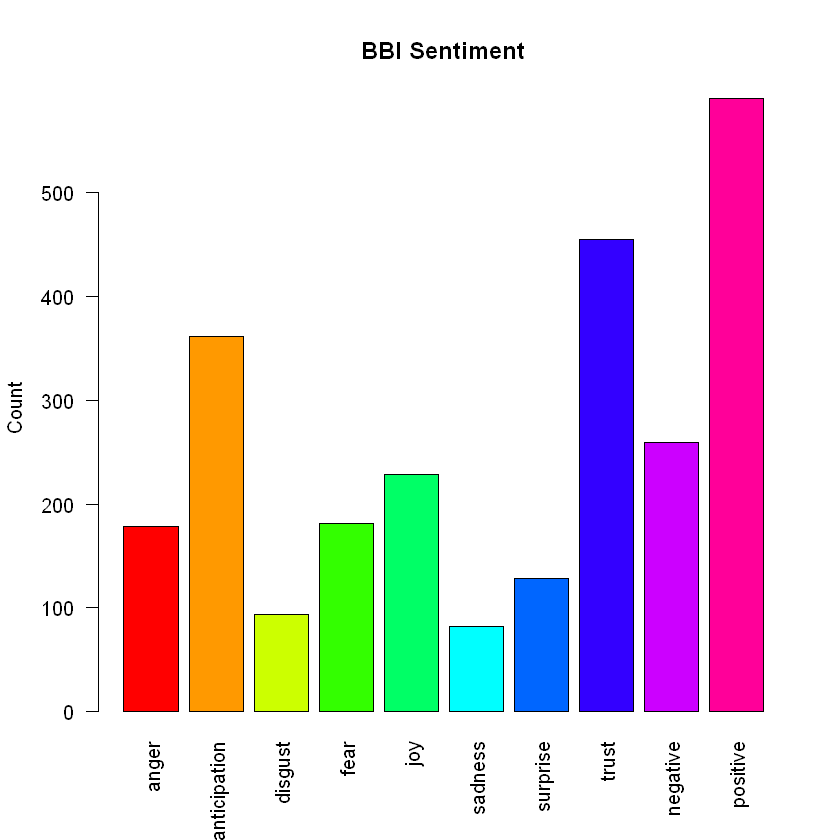

In [28]:
## Aggregated sentiment from tweets
barplot(colSums(s),las=2,col=rainbow(10),ylab="Count",main=plot_topic)